<a href="https://colab.research.google.com/github/sky309/Global-Terrorism-Analysis/blob/main/Sarvesh_Kumar_Yadav_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file='/content/drive/MyDrive/AlmaBetter/Modules/week3/09-06-2021-/Assignment/Copy of Global Terrorism Data.csv'

In [ ]:
df= pd.read_csv(file, encoding= "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#Analysis based on Indian Terrorist Group:
#1) Top cities to live in India v/s number of attack 
#2) Top cities to live in India v/s amount of damage 
  # 3) Number of Terrorsit attack group vs Type of Attack 
# 4) Number of Attacks happen in each year '''


In [ ]:
df.shape

(181691, 135)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [ ]:
sub_df = df[['eventid','iyear','country_txt','region_txt','provstate','city','attacktype1_txt','targtype1_txt','nkill','weapdetail','nwound','gname']]

In [ ]:
sub_df.rename(columns={'eventid':'id','iyear':'year','country_txt':'country','provstate':'state','region_txt':'region','attacktype1_txt':'attack_type','targtype1_txt':'target_type','nkill':'total_kills','provstat':'total_wou*nds','gname':'terrorist_group'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
sub_df


,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,nwound,terrorist_group
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,1.0,NaN,0.0,MANO-D
1,197000000002,1970,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,NaN,0.0,23rd of September Communist League
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,1.0,NaN,0.0,Unknown
3,197001000002,1970,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),NaN,Explosive,NaN,Unknown
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),NaN,Incendiary,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,1.0,NaN,2.0,Al-Shabaab
181687,201712310029,2017,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,2.0,Mortars were used in the attack.,7.0,Muslim extremists
181688,201712310030,2017,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,0.0,NaN,0.0,Bangsamoro Islamic Freedom Movement (BIFM)
181689,201712310031,2017,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),0.0,A thrown grenade was used in the attack.,0.0,Unknown


#Top cities to live in India v/s number of attack


In [ ]:
sub_df

,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,nwound,terrorist_group
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,1.0,NaN,0.0,MANO-D
1,197000000002,1970,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,NaN,0.0,23rd of September Communist League
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,1.0,NaN,0.0,Unknown
3,197001000002,1970,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),NaN,Explosive,NaN,Unknown
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),NaN,Incendiary,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,1.0,NaN,2.0,Al-Shabaab
181687,201712310029,2017,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,2.0,Mortars were used in the attack.,7.0,Muslim extremists
181688,201712310030,2017,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,0.0,NaN,0.0,Bangsamoro Islamic Freedom Movement (BIFM)
181689,201712310031,2017,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),0.0,A thrown grenade was used in the attack.,0.0,Unknown


In [ ]:
df_India= sub_df[sub_df['country']=='India']
df_India

,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,nwound,terrorist_group
1186,197202220004,1972,India,South Asia,Delhi,New Delhi,Hijacking,Airports & Aircraft,0.0,Explosives,0.0,Palestinians
2764,197501190004,1975,India,South Asia,Bihar,Samastipur,Bombing/Explosion,Government (General),4.0,No additional information available.,0.0,Ananda Marga
3857,197605260001,1976,India,South Asia,Delhi,New Delhi,Bombing/Explosion,Airports & Aircraft,0.0,Explosive,0.0,Unknown
5327,197709280004,1977,India,South Asia,Maharashtra,Bombay,Hijacking,Airports & Aircraft,0.0,Firearm; Grenades,0.0,Japanese Red Army (JRA)
7337,197901130004,1979,India,South Asia,Assam,Unknown,Armed Assault,Police,NaN,Automatic firearm,NaN,Naga People
...,...,...,...,...,...,...,...,...,...,...,...,...
181663,201712300021,2017,India,South Asia,Kerala,Koothuparamba,Bombing/Explosion,Police,0.0,A crude bomb was used in the attack.,0.0,Unknown
181665,201712300023,2017,India,South Asia,Chhattisgarh,Toylanka,Facility/Infrastructure Attack,Business,0.0,NaN,0.0,Communist Party of India - Maoist (CPI-Maoist)
181672,201712310005,2017,India,South Asia,Jammu and Kashmir,Lethapora,Armed Assault,Police,8.0,Grenades and AK-47 assault rifles loaded with ...,3.0,Jaish-e-Mohammad (JeM)
181684,201712310019,2017,India,South Asia,Assam,Hungrum,Hostage Taking (Kidnapping),Government (General),0.0,A 9-mm carbine rifle was used in the attack.,0.0,Zeliangrong United Front


In [ ]:

city= df_India['city']
list_city= city.tolist()
list_state=df_India['state'].tolist()
list_state
list_city
new_city_list=[]
for i in range(len(list_city)):
  if list_city[i]=='Unknown':
    new_city_list.append(list_state[i])
  else:
    new_city_list.append(list_city[i])
new_city_list

['New Delhi',
 'Samastipur',
 'New Delhi',
 'Bombay',
 'Assam',
 'Imphal',
 'Manipur',
 'Mizoram',
 'Assam',
 'Aizawl',
 'Aizawl',
 'Amapur',
 'Raisikah',
 'Champhai',
 'Aizawl',
 'Jamshedpur',
 'New Delhi',
 'New Delhi',
 'Jamshedpur',
 'Chennai',
 'Manipur',
 'Uttar Pradesh',
 'Manipur',
 'Bihar',
 'Imphal',
 'Manipur',
 'Chiaplant',
 'Tindol',
 'Calcutta',
 'New Delhi',
 'Tirupattur',
 'Assam',
 'Assam',
 'Assam',
 'Manipur',
 'Assam',
 'Assam',
 'Gauhati',
 'Gauhati',
 'Jorhat',
 'Nagaland',
 'Assam',
 'Unknown',
 'Manipur',
 'Assam',
 'Manipur',
 'Massad',
 'New Delhi',
 'Chandigarh',
 'Chandigarh',
 'Manipur',
 'West Bengal',
 'Gauhati',
 'New Delhi',
 'Aizawl',
 'Mizoram',
 'Jodhpur',
 'Bombay',
 'Amritsar',
 'Tipaimukh',
 'Amritsar',
 'New Delhi',
 'Bombay',
 'Assam',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'Gauhati',
 'Guwahati',
 'New Delhi',
 'New Delhi',
 'Assam',
 'Gauhati',
 'Harchowal',
 'Mothan Wala',
 'Qadian',
 'Punjab',
 'Baloda Bazar',
 'Gauhati',
 'Gauhati',
 'G

In [ ]:
df_India['new_city_list']= new_city_list
df_India

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,nwound,terrorist_group,new_city_list
1186,197202220004,1972,India,South Asia,Delhi,New Delhi,Hijacking,Airports & Aircraft,0.0,Explosives,0.0,Palestinians,New Delhi
2764,197501190004,1975,India,South Asia,Bihar,Samastipur,Bombing/Explosion,Government (General),4.0,No additional information available.,0.0,Ananda Marga,Samastipur
3857,197605260001,1976,India,South Asia,Delhi,New Delhi,Bombing/Explosion,Airports & Aircraft,0.0,Explosive,0.0,Unknown,New Delhi
5327,197709280004,1977,India,South Asia,Maharashtra,Bombay,Hijacking,Airports & Aircraft,0.0,Firearm; Grenades,0.0,Japanese Red Army (JRA),Bombay
7337,197901130004,1979,India,South Asia,Assam,Unknown,Armed Assault,Police,NaN,Automatic firearm,NaN,Naga People,Assam
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181663,201712300021,2017,India,South Asia,Kerala,Koothuparamba,Bombing/Explosion,Police,0.0,A crude bomb was used in the attack.,0.0,Unknown,Koothuparamba
181665,201712300023,2017,India,South Asia,Chhattisgarh,Toylanka,Facility/Infrastructure Attack,Business,0.0,NaN,0.0,Communist Party of India - Maoist (CPI-Maoist),Toylanka
181672,201712310005,2017,India,South Asia,Jammu and Kashmir,Lethapora,Armed Assault,Police,8.0,Grenades and AK-47 assault rifles loaded with ...,3.0,Jaish-e-Mohammad (JeM),Lethapora
181684,201712310019,2017,India,South Asia,Assam,Hungrum,Hostage Taking (Kidnapping),Government (General),0.0,A 9-mm carbine rifle was used in the attack.,0.0,Zeliangrong United Front,Hungrum


In [ ]:
df_number_of_attacks_by_cities =df_India['new_city_list'].value_counts().rename_axis('unique_cities').reset_index(name='number_of_attacks')
df_sorted_city_by_attacks= df_number_of_attacks_by_cities.sort_values(['number_of_attacks'], ascending= True).reset_index(drop= True)

In [ ]:
df_sorted_city_by_attacks

,unique_cities,number_of_attacks
0,Koracha,1
1,Khamesi,1
2,Lairenkabi,1
3,Rishra,1
4,Bangdar,1
...,...,...
4818,Amritsar,138
4819,Punjab,155
4820,New Delhi,157
4821,Imphal,426


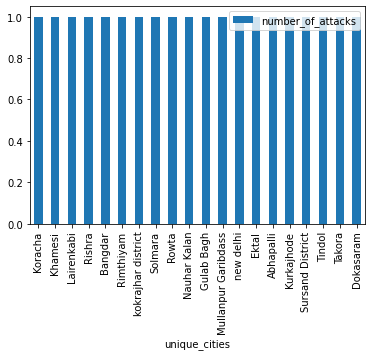

In [ ]:
df_sorted_city_by_attacks.head(20).plot(kind='bar',x='unique_cities',y='number_of_attacks')

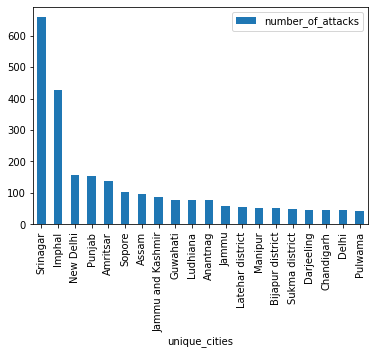

In [ ]:
df_sorted_city_by_attacks2= df_number_of_attacks_by_cities.sort_values(['number_of_attacks'], ascending= False).reset_index(drop= True)
df_sorted_city_by_attacks2.head(20).plot(kind='bar',x='unique_cities',y='number_of_attacks')

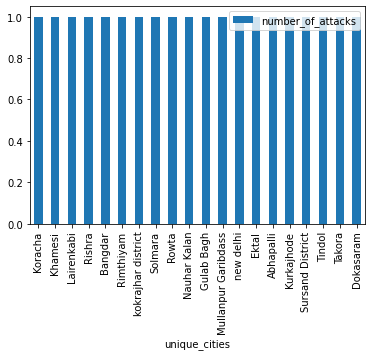

In [ ]:
df_best_safe_city= df_sorted_city_by_attacks.head(20).plot(kind='bar',x='unique_cities',y='number_of_attacks')

#Top cities to live in India v/s amount of damage

In [ ]:
df_India.head(5)

,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,nwound,terrorist_group,new_city_list
1186,197202220004,1972,India,South Asia,Delhi,New Delhi,Hijacking,Airports & Aircraft,None,Explosives,0.0,Palestinians,New Delhi
2764,197501190004,1975,India,South Asia,Bihar,Samastipur,Bombing/Explosion,Government (General),None,No additional information available.,0.0,Ananda Marga,Samastipur
3857,197605260001,1976,India,South Asia,Delhi,New Delhi,Bombing/Explosion,Airports & Aircraft,None,Explosive,0.0,Unknown,New Delhi
5327,197709280004,1977,India,South Asia,Maharashtra,Bombay,Hijacking,Airports & Aircraft,None,Firearm; Grenades,0.0,Japanese Red Army (JRA),Bombay
7337,197901130004,1979,India,South Asia,Assam,Unknown,Armed Assault,Police,None,Automatic firearm,NaN,Naga People,Assam


In [ ]:
df_india['total_kills'].mean()

1.6474446337308348

In [ ]:
df_India['total_kills'].replace('NaN', 1)

1186      0.0
2764      4.0
3857      0.0
5327      0.0
7337      NaN
         ... 
181663    0.0
181665    0.0
181672    8.0
181684    0.0
181689    0.0
Name: total_kills, Length: 11960, dtype: float64

In [ ]:
df_India.head()

,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,nwound,terrorist_group,new_city_list
1186,197202220004,1972,India,South Asia,Delhi,New Delhi,Hijacking,Airports & Aircraft,0.0,Explosives,0.0,Palestinians,New Delhi
2764,197501190004,1975,India,South Asia,Bihar,Samastipur,Bombing/Explosion,Government (General),4.0,No additional information available.,0.0,Ananda Marga,Samastipur
3857,197605260001,1976,India,South Asia,Delhi,New Delhi,Bombing/Explosion,Airports & Aircraft,0.0,Explosive,0.0,Unknown,New Delhi
5327,197709280004,1977,India,South Asia,Maharashtra,Bombay,Hijacking,Airports & Aircraft,0.0,Firearm; Grenades,0.0,Japanese Red Army (JRA),Bombay
7337,197901130004,1979,India,South Asia,Assam,Unknown,Armed Assault,Police,NaN,Automatic firearm,NaN,Naga People,Assam
